# House Price Prediction

In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn import metrics as sm


# Read Train Dataset

In [349]:
df_train = pd.read_csv('D:\\Codewarriors\\HPP\\train.csv')

In [350]:
df_train.head(4)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  

[4 rows x 81 columns]

In [351]:
df_train.shape

(1460, 81)

In [352]:
df_train = df_train.drop(columns=['Id'])  ##here delete id column from train dataset
df_train.head(4)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  

[4 rows x 80 columns]

In [353]:
df_train.shape

(1460, 80)

In [354]:
pd.options.display.max_rows

60

In [355]:
pd.options.display.max_columns

20

In [356]:
df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [357]:
df_train.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [358]:
df_train.keys()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [359]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [360]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [361]:
df_train.isnull().values.any() ##null values are present in this dataset 

True

In [362]:
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

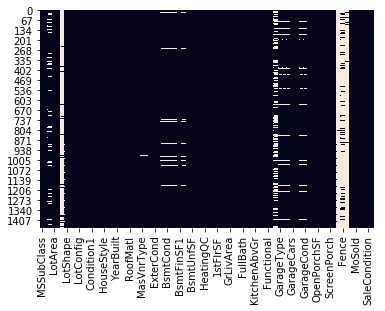

In [363]:
sns.heatmap(df.isnull(), cbar = False)  ##heatmap showing null values
plt.show()

# Null values

In [364]:
df_train.isnull().sum().sort_values(ascending=False) ##null values from dataset arranged in ascending order

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

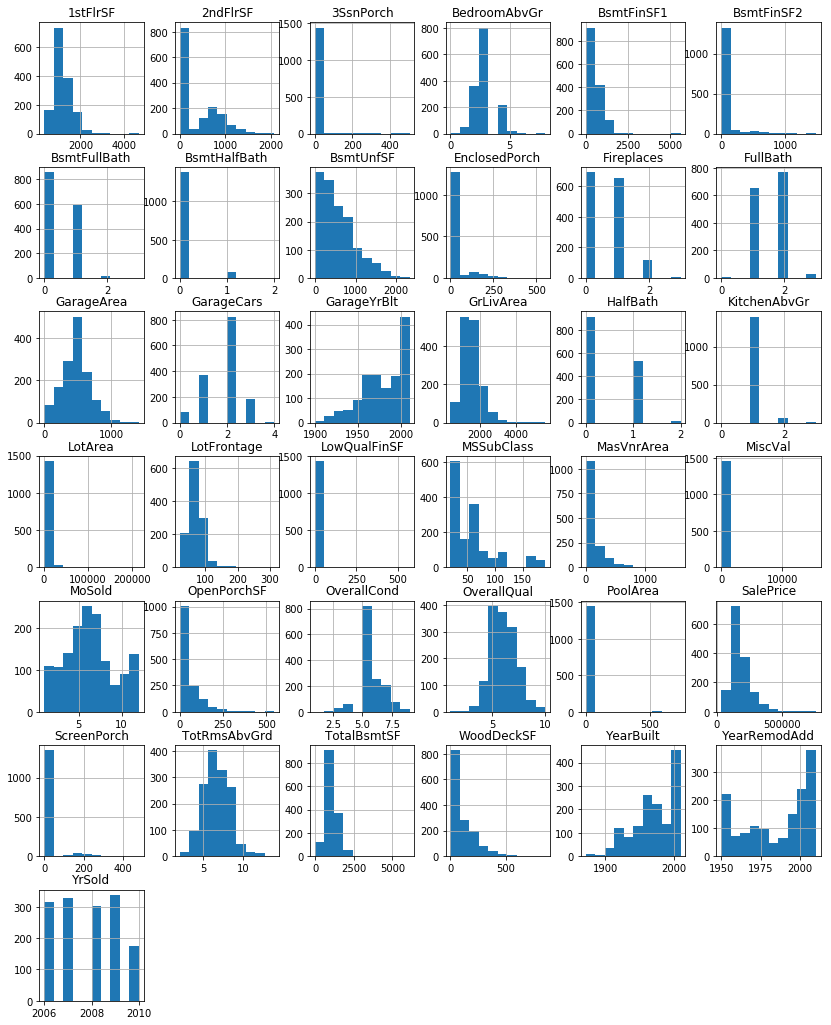

In [365]:
df_train.hist(figsize = (14,18))  ## with the help of histogram saw the distribution of dataset
plt.show()

In [366]:
##Target variable is continuous in nature so here pearson correlation method is used

In [367]:
df_train.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

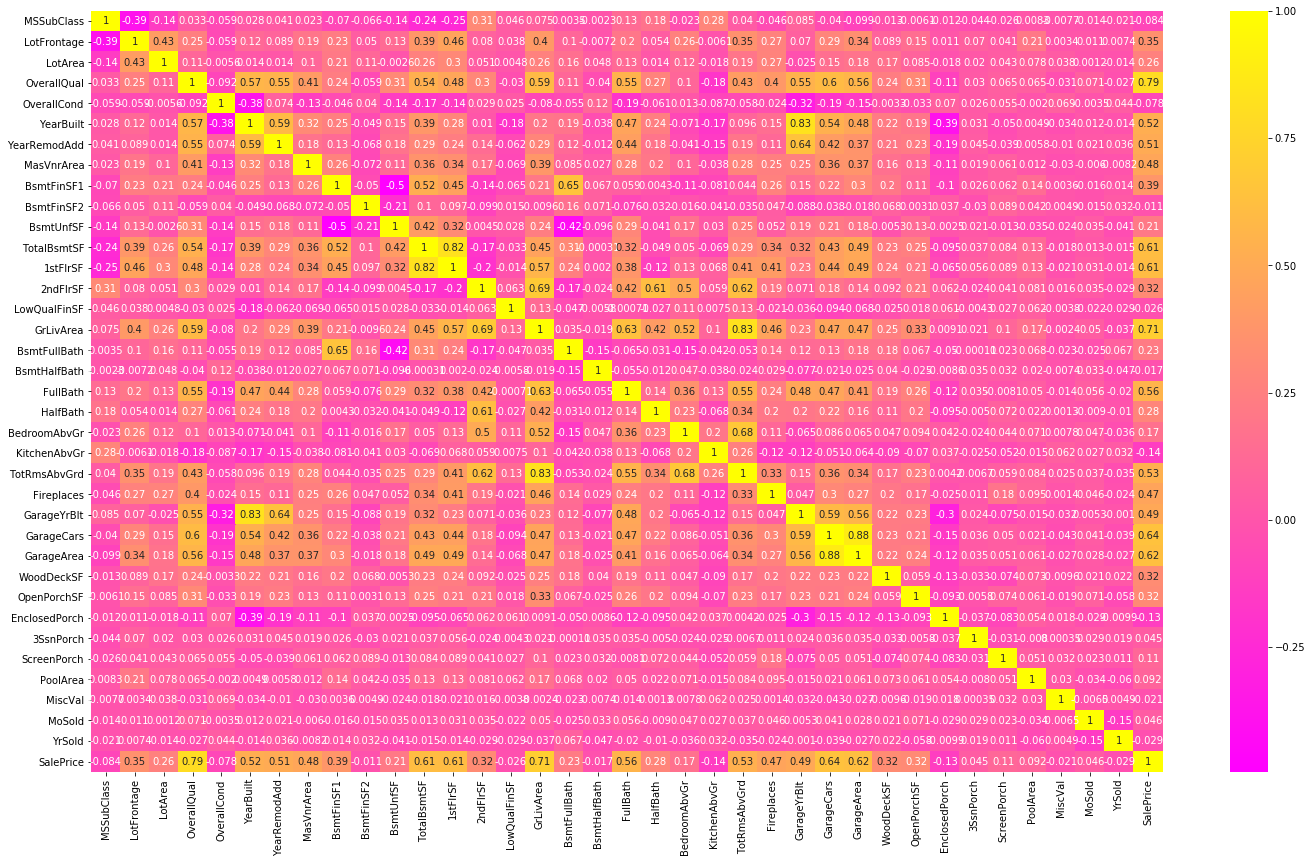

In [368]:
plt.figure(figsize=(24,14))
sns.heatmap(df_train.corr(),annot=True,cmap ="spring" )

# Fill na values

In [369]:
#filling na values
df_train1 = df_train.fillna({'FireplaceQu':'No Fire Place','GarageType':'No Garage',
                    'GarageFinish':'No Garage',
                   'GarageQual':'No Garage','GarageCond':'No Garage', 'Alley':'Not Applicable',
                    'PoolQC':'No Pool','Fence':'No Fence','MiscFeature':'None','BsmtFinType2':'No Basement', 'BsmtFinType1':'No Basement'
                   ,'BsmtExposure':'No Basement','BsmtQual':'No Basement', 'BsmtCond':'No Basement'})
df_train1.head(4)

MSSubClass MSZoning  LotFrontage  LotArea Street           Alley LotShape  \
0          60       RL         65.0     8450   Pave  Not Applicable      Reg   
1          20       RL         80.0     9600   Pave  Not Applicable      Reg   
2          60       RL         68.0    11250   Pave  Not Applicable      IR1   
3          70       RL         60.0     9550   Pave  Not Applicable      IR1   

  LandContour Utilities LotConfig  ... PoolArea   PoolQC     Fence  \
0         Lvl    AllPub    Inside  ...        0  No Pool  No Fence   
1         Lvl    AllPub       FR2  ...        0  No Pool  No Fence   
2         Lvl    AllPub    Inside  ...        0  No Pool  No Fence   
3         Lvl    AllPub    Corner  ...        0  No Pool  No Fence   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0        None       0      2    2008        WD         Normal     208500  
1        None       0      5    2007        WD         Normal     181500  
2        None       0      9    2008        WD         Normal     223500  
3        None       0      2    2006        WD        Abnorml     140000  

[4 rows x 80 columns]

In [370]:
df_train1["Electrical"].value_counts(),df_train1["MasVnrType"].value_counts()

(SBrkr    1334
 FuseA      94
 FuseF      27
 FuseP       3
 Mix         1
 Name: Electrical, dtype: int64, None       864
 BrkFace    445
 Stone      128
 BrkCmn      15
 Name: MasVnrType, dtype: int64)

In [371]:
df_train1['Electrical'].fillna(df_train['Electrical'].mode()[0],inplace = True)

In [372]:
df_train1['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0],inplace = True)

In [373]:
df_train1['LotFrontage'].fillna(df_train['LotFrontage'].mean(),inplace = True)

In [374]:
df_train1['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean(),inplace = True)

In [375]:
df_train1['MasVnrArea'].fillna(df_train['MasVnrArea'].mean(),inplace = True)

In [376]:
df_train1.MasVnrArea.isnull().sum()

0

In [377]:
df_train1.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

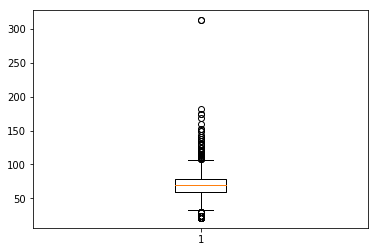

In [378]:
plt.boxplot(df_train1.LotFrontage)
plt.show()

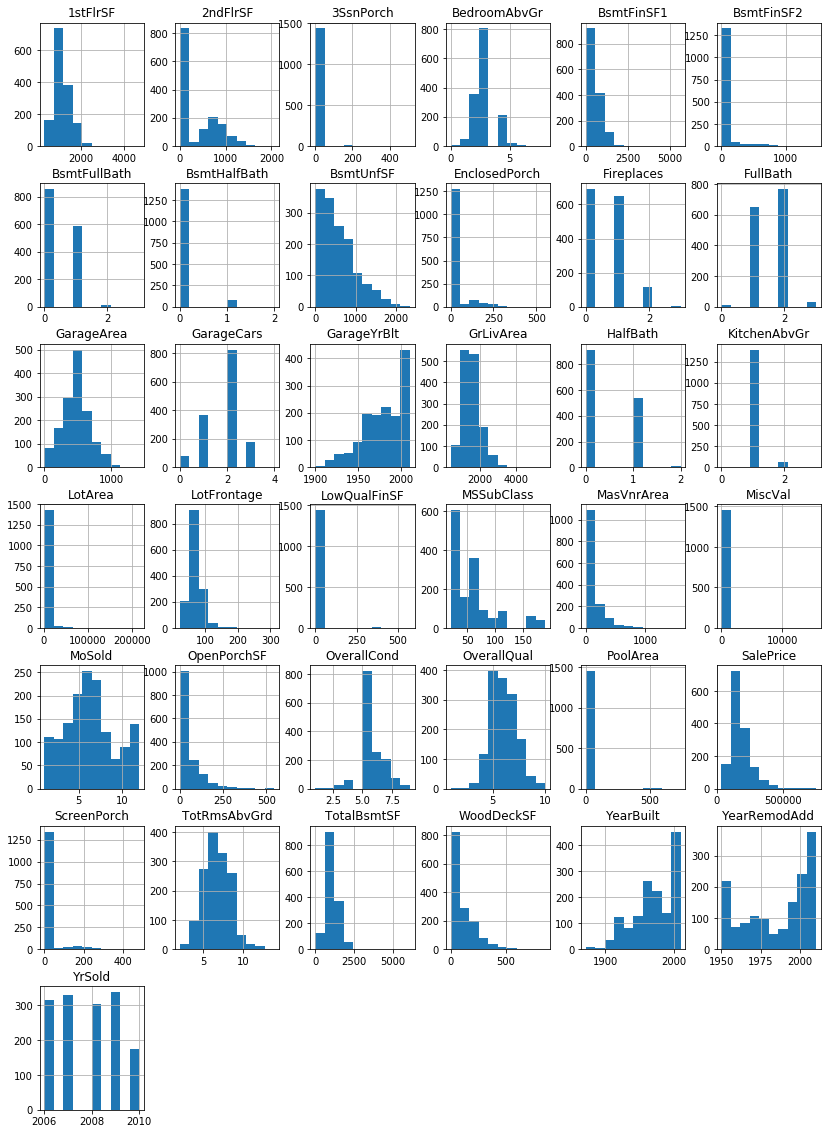

In [379]:
df_train1.hist(figsize =(14,20))
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


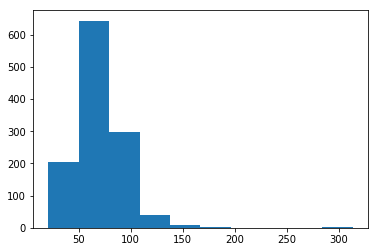

In [380]:
plt.hist(x=df_train.LotFrontage)
plt.show()

In [381]:
df_train["MSSubClass"].dtypes

dtype('int64')

In [382]:
df_train["MSSubClass"].value_counts(),df_train["OverallQual"].value_counts(),

(20     536
 60     299
 50     144
 120     87
 30      69
 160     63
 70      60
 80      58
 90      52
 190     30
 85      20
 75      16
 45      12
 180     10
 40       4
 Name: MSSubClass, dtype: int64, 5     397
 6     374
 7     319
 8     168
 4     116
 9      43
 3      20
 10     18
 2       3
 1       2
 Name: OverallQual, dtype: int64)

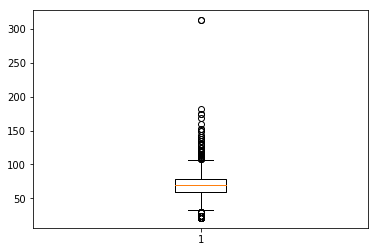

In [383]:
plt.boxplot(df_train1.LotFrontage)
plt.show()

In [384]:
# df1.MSSubClass = df1.MSSubClass.astype('category')
# df1.OverallQual = df1.OverallQual.astype('category')
# df1.OverallCond = df1.OverallCond.astype('category')

In [385]:
q1 = df_train1.LotFrontage.quantile(0.01)
print(q1)
q3 = df_train1.LotFrontage.quantile(0.99)
iqr = q3-q1
print(q3)
print(iqr)

21.0
137.41000000000008
116.41000000000008


In [386]:
q1 = df_train1.quantile(0.01)
#print(q1)
q3 = df_train1.quantile(0.99)
#print(q3)
iqr = q3-q1
print(iqr)

MSSubClass          170.00
LotFrontage         116.41
LotArea           35887.64
OverallQual           7.00
OverallCond           6.00
YearBuilt           109.82
YearRemodAdd         59.00
MasVnrArea          791.28
BsmtFinSF1         1572.41
BsmtFinSF2          830.38
BsmtUnfSF          1797.05
TotalBsmtSF        2155.05
1stFlrSF           1699.46
2ndFlrSF           1418.92
LowQualFinSF        360.00
GrLivArea          2431.30
BsmtFullBath          2.00
BsmtHalfBath          1.00
FullBath              2.00
HalfBath              1.00
BedroomAbvGr          4.00
KitchenAbvGr          1.00
TotRmsAbvGrd          8.00
Fireplaces            2.00
GarageYrBlt          91.82
GarageCars            3.00
GarageArea         1002.79
WoodDeckSF          505.46
OpenPorchSF         285.82
EnclosedPorch       261.05
3SsnPorch           168.00
ScreenPorch         268.05
PoolArea              0.00
MiscVal             700.00
MoSold               11.00
YrSold                4.00
SalePrice        380751.04
d

In [387]:
min = q1 #-1.5*iqr
max = q3 # + 1.5*iqr
print(min, max)

MSSubClass          20.00
LotFrontage         21.00
LotArea           1680.00
OverallQual          3.00
OverallCond          3.00
YearBuilt         1899.18
YearRemodAdd      1950.00
MasVnrArea           0.00
BsmtFinSF1           0.00
BsmtFinSF2           0.00
BsmtUnfSF            0.00
TotalBsmtSF          0.00
1stFlrSF           520.00
2ndFlrSF             0.00
LowQualFinSF         0.00
GrLivArea          692.18
BsmtFullBath         0.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             0.00
BedroomAbvGr         1.00
KitchenAbvGr         1.00
TotRmsAbvGrd         3.00
Fireplaces           0.00
GarageYrBlt       1917.18
GarageCars           0.00
GarageArea           0.00
WoodDeckSF           0.00
OpenPorchSF          0.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               1.00
YrSold            2006.00
SalePrice        61815.97
Name: 0.01, dtype: float64 MSSubClass 

In [388]:
#print(df_train1 < (q1 - 1.5 * iqr)) |(df_train1 > (q3 + 1.5 * iqr))

In [389]:
df_train1_num=df_train1.select_dtypes(include=['int64','float64'])

In [390]:
indexes = df_train1_num.index[((df_train1_num < (q1)) | (df_train1_num > (q3))).any(axis=1)]
print(indexes.shape, df_train1.shape)

(281,) (1460, 80)


In [391]:
df_train2 = df_train1.drop(index=indexes)

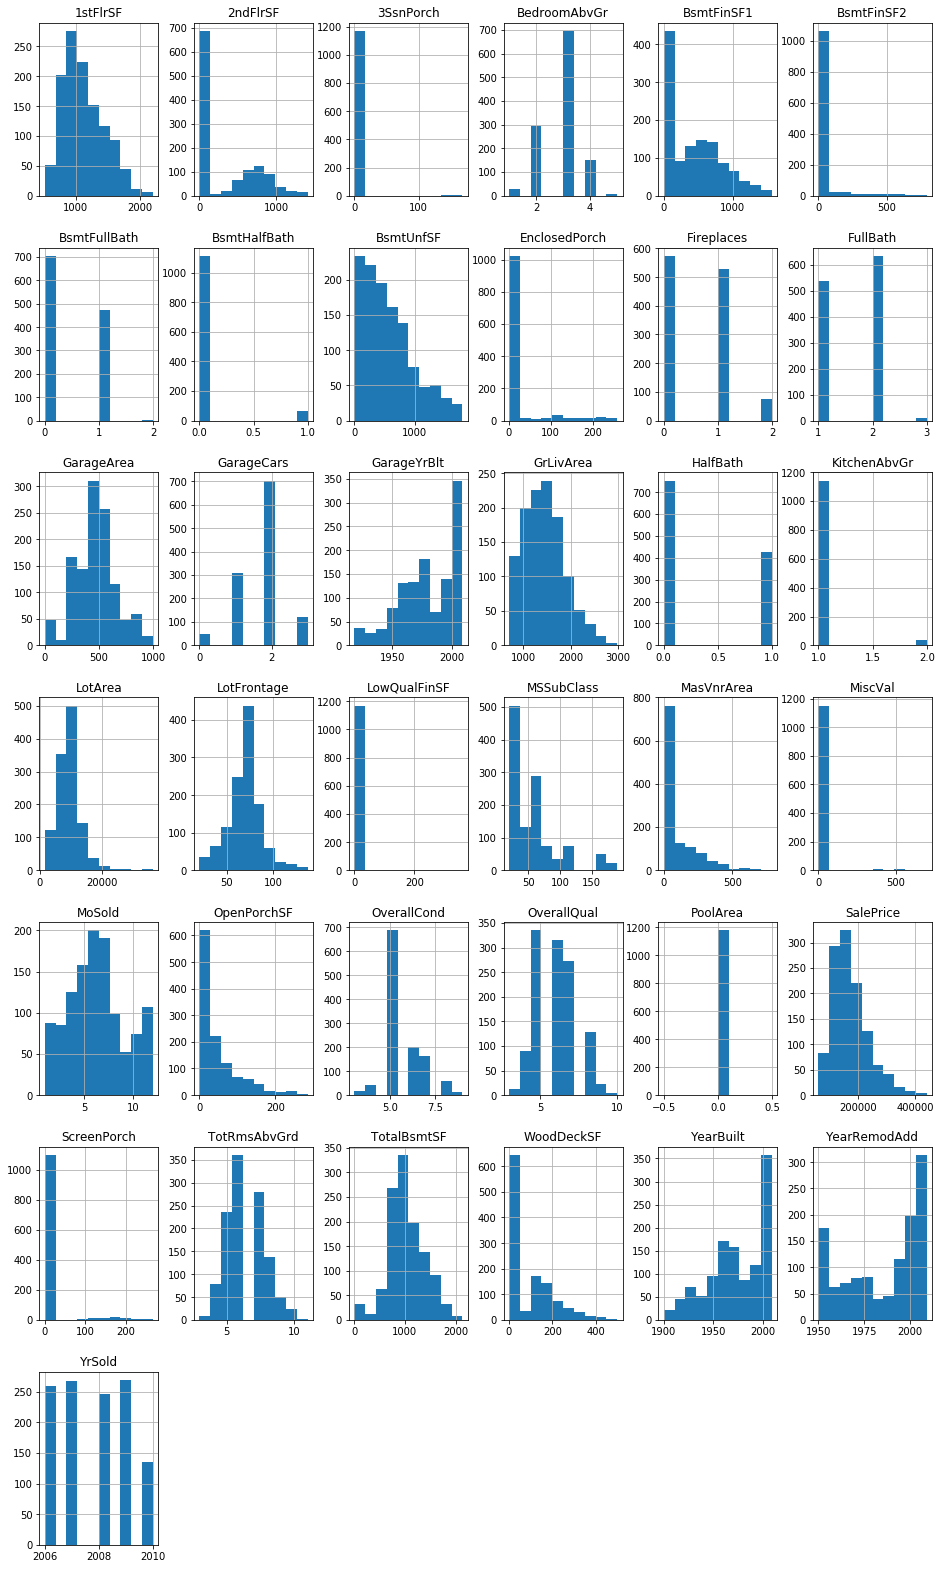

In [392]:
df_train2.hist(figsize = (16,28))
plt.show()

In [393]:
df_train2 = stats.boxcox(df_train2['LotFrontage'].values,lmbda=0.05)
df_train2

array([4.64198356, 4.89914848, 4.69763917, ..., 4.58383204, 4.58383204,
       4.97473806])

In [394]:
df_train1.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

In [395]:
df_train1_obj=df_train1.select_dtypes(exclude=['int64','float64'])
df_train1_num=df_train1.select_dtypes(include=['int64','float64'])
df_train1.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [396]:
df2_encoded=df_train1_obj.apply(LabelEncoder().fit_transform)
df_train2=df_train1_num.join(df2_encoded)
df_train2.head(5)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageType  \
0          2003       196.0         706           0  ...           1   
1          1976         0.0         978           0  ...           1   
2          2002       162.0         486           0  ...           1   
3          1970         0.0         216           0  ...           5   
4          2000       350.0         655           0  ...           1   

   GarageFinish  GarageQual  GarageCond  PavedDrive  PoolQC  Fence  \
0             2           5           5           2       3      4   
1             2           5           5           2       3      4   
2             2           5           5           2       3      4   
3             3           5           5           2       3      4   
4             2           5           5           2       3      4   

   MiscFeature  SaleType  SaleCondition  
0            1         8              4  
1            1         8              4  
2            1         8              4  
3            1         8              0  
4            1         8              4  

[5 rows x 80 columns]

In [397]:
df1_num.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageArea  WoodDeckSF  \
0           0        150          856       856  ...         548           0   
1           0        284         1262      1262  ...         460         298   
2           0        434          920       920  ...         608           0   
3           0        540          756       961  ...         642           0   
4           0        490         1145      1145  ...         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  
0       2    2008  
1       5    2007  
2       9    2008  
3       2    2006  
4      12    2008  

[5 rows x 33 columns]

In [398]:
df2_encoded.shape

(1460, 43)

In [399]:
cor=df_train1.corr()
cor_target = cor["SalePrice"]
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.470177
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

# Model Building

In [400]:
df_train2 = df_train2.drop(columns=['SalePrice'])  ##here delete target column from train dataset
df_train2.shape

(1460, 79)

In [401]:
inputData=df_train2
outputData=df_train['SalePrice']

In [402]:
seed=10
test_size=0.3
x_train,x_test,y_train,y_test= train_test_split(inputData,outputData,test_size=test_size,random_state=seed)

In [403]:
x_test.shape,x_train.shape

((438, 79), (1022, 79))

In [404]:
y_test.shape,y_train.shape

((438,), (1022,))

In [405]:
x_train.shape,y_train.shape

((1022, 79), (1022,))

# 1.Linear Regression

In [407]:
lr =LinearRegression()
model = lr.fit(x_train,y_train)

In [408]:
pred = model.predict(x_test)

In [409]:
train_MSE = np.mean((y_train - model.predict(x_train))**2)

In [410]:
train_MSE

961152762.1493577

In [411]:
model.score(x_train, y_train)

0.8520056997277078

# Using Highly correlated features only

In [412]:
inputData=df_train2[["OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","Fireplaces",
         "GarageYrBlt","GarageCars","GarageArea"]]

In [413]:
seed=10
test_size=0.3
x_train,x_test,y_train,y_test= train_test_split(inputData,outputData,test_size=test_size,random_state=seed)

In [414]:
lr =LinearRegression()
model = lr.fit(x_train,y_train)
pred = model.predict(x_test)

In [415]:
train_MSE = np.mean((y_train - model.predict(x_train))**2)
train_MSE

1492844317.1509542

In [416]:
model.score(x_train, y_train)

0.7701380479434221

In [417]:
pred_train = model.predict(x_train) # prediction on train data
print(r2_score(y_train,pred_train)) # r2 score of train set

0.7701380479434221


In [639]:
pred_test = model.predict(x_test) # prediction on test data
print(r2_score(y_test,pred_test)) # r2 score of test set

0.8296939716876571


# 2. GradientBoostingRegressor

In [418]:
from sklearn.ensemble import GradientBoostingRegressor
pre_gb_model=GradientBoostingRegressor(warm_start=True)#always I'd like to use the warm_start parameter to add training data to my random forest classifier
pre_gb_model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=True)

In [419]:
y_pred_probs = pre_gb_model.predict(x_test)

In [420]:
mean_squared_error(y_test,y_pred_probs)

776275893.0169522

In [421]:
r2_score(y_test,y_pred_probs)

0.867494021310286

In [422]:
pred_train_gb = pre_gb_model.predict(x_train) # prediction on train data
print(r2_score(y_train,pred_train_gb)) # r2 score of train set

0.9488159177885396


In [423]:
pre_gb_model.score(x_train,y_train)

0.9488159177885396

# 3. RandomForestRegressor

In [424]:
from sklearn.ensemble import RandomForestRegressor
modelr=RandomForestRegressor(random_state=1,max_depth=10)
modelr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [425]:
modelr.score(x_train,y_train)

0.9700974549596664

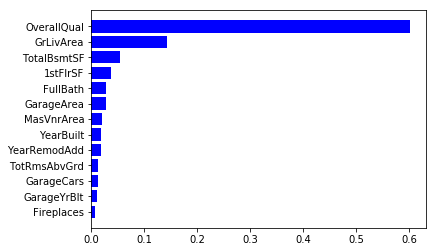

In [426]:
features=inputData.columns
importances=modelr.feature_importances_
indices=np.argsort(importances)[-20:]
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.show()

# 4. XGBRegressor

In [427]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(warm_start=True)
xgb_model.fit(x_train,y_train)

[17:38:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1, warm_start=True)

In [428]:
xgb_model.score(x_train,y_train)

0.9450047171860632

In [429]:
y_pred_probs_gb = xgb_model.predict(x_test)
mean_squared_error(y_test,y_pred_probs_gb)

861441164.4954356

In [430]:
r2_score(y_test,y_pred_probs_gb)

0.8529567830047482

# Conclusion

# Random forest is best model.It gives high accuracy 97%

# Working on Test Dataset

In [598]:
df_test = pd.read_csv('D:\\Codewarriors\\HPP\\test.csv')
df_test.head(4)
id_val = df_test["Id"]
id_val

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [599]:
df_test.shape

(1459, 80)

In [600]:
df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [601]:
df_test.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [602]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

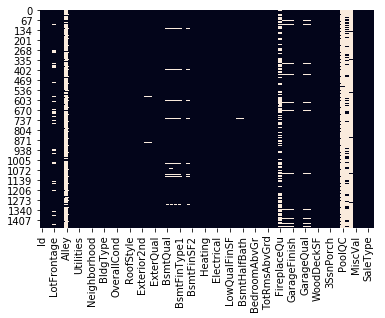

In [603]:
sns.heatmap(df_test.isnull(), cbar = False)
plt.show()

In [604]:
df_test.shape

(1459, 80)

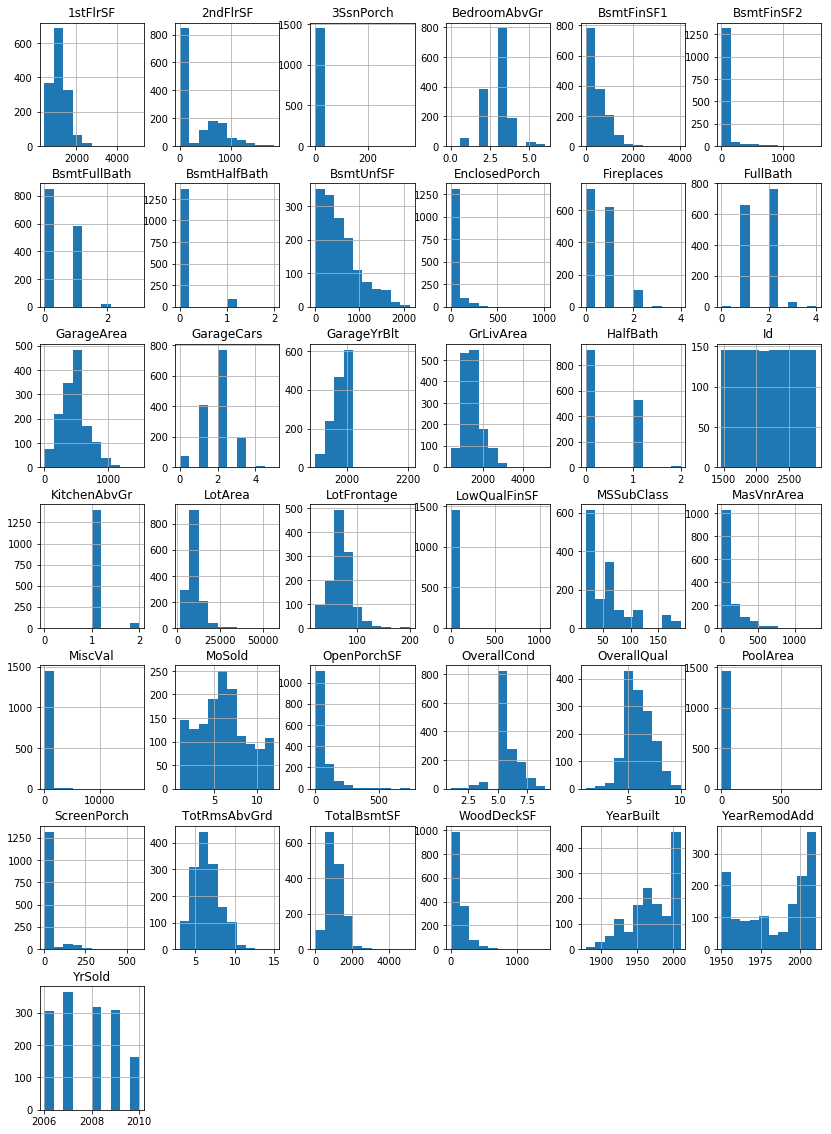

In [605]:
df_test.hist(figsize = (14,20))
plt.show()

In [606]:
df_test.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
LotFrontage       227
GarageCond         78
GarageQual         78
GarageYrBlt        78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
MasVnrType         16
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
Exterior2nd         1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
Exterior1st         1
                 ... 
OverallQual         0
SaleCondition       0
Heating             0
ExterQual           0
TotRmsAbvGrd        0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive

In [607]:
#filling na values
df_test1 = df_test.fillna({'FireplaceQu':'No Fire Place','GarageType':'No Garage',
                    'GarageFinish':'No Garage',
                   'GarageQual':'No Garage','GarageCond':'No Garage', 'Alley':'no alley access',
                    'PoolQC':'No Pool','Fence':'No Fence','MiscFeature':'None','BsmtFinType2':'No Basement', 'BsmtFinType1':'No Basement'
                   ,'BsmtExposure':'No Basement','BsmtQual':'No Basement', 'BsmtCond':'No Basement'})
df_test1.head(4)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0  1461          20       RH         80.0    11622   Pave  no alley access   
1  1462          20       RL         81.0    14267   Pave  no alley access   
2  1463          60       RL         74.0    13830   Pave  no alley access   
3  1464          60       RL         78.0     9978   Pave  no alley access   

  LotShape LandContour Utilities  ... ScreenPorch PoolArea   PoolQC     Fence  \
0      Reg         Lvl    AllPub  ...         120        0  No Pool     MnPrv   
1      IR1         Lvl    AllPub  ...           0        0  No Pool  No Fence   
2      IR1         Lvl    AllPub  ...           0        0  No Pool     MnPrv   
3      IR1         Lvl    AllPub  ...           0        0  No Pool  No Fence   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0        None       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2        None       0      3    2010        WD         Normal  
3        None       0      6    2010        WD         Normal  

[4 rows x 80 columns]

In [608]:
df_test1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
                ... 
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Functional         2
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt       78
GarageFinish       0
GarageCars         1
GarageArea         1
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF   

In [609]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_test1[col] = df_test1[col].fillna(0)

In [610]:
df_test1['LotFrontage'].fillna(df_test['LotFrontage'].median(),inplace = True)

df_test1['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0],inplace = True)

df_test1['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0],inplace = True)

df_test1['MSZoning'].fillna(df_test['MSZoning'].mode()[0],inplace = True)

df_test1['Utilities'].fillna(df_test['Utilities'].mode()[0],inplace = True)

df_test1['SaleType'].fillna(df_test['SaleType'].mode()[0],inplace =True)

df_test1['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0],inplace = True)

df_test1['GarageType'].fillna(df_test['GarageType'].mode()[0],inplace = True)

In [611]:
df_test1['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0],inplace = True)

df_test1['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0],inplace = True)

df_test1['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0],inplace = True)

df_test1['GarageCars'].fillna(df_test['GarageCars'].mode()[0],inplace = True)

df_test1['SaleType'].fillna(df_test['SaleType'].mode()[0],inplace = True)

df_test1['Functional'].fillna(df_test['Functional'].mode()[0],inplace = True)

df_test1['GarageArea'].fillna(df_test['GarageArea'].mean(),inplace = True)

In [612]:
df_test1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

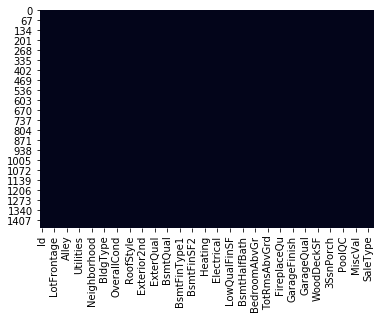

In [613]:
sns.heatmap(df_test1.isnull(), cbar = False)
plt.show()

In [614]:
df_test1.BsmtFullBath.isnull().sum()

0

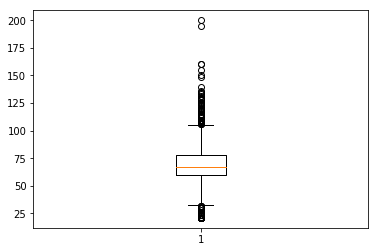

In [615]:
plt.boxplot(df_test1.LotFrontage)
plt.show()

In [616]:
df_test1.MSSubClass = df_test.MSSubClass.astype('category')
df_test1.OverallQual = df_test.OverallQual.astype('category')
df_test1.OverallCond = df_test.OverallCond.astype('category')

In [617]:
df_test1_num=df_test1.select_dtypes(include=['int64','float64'])

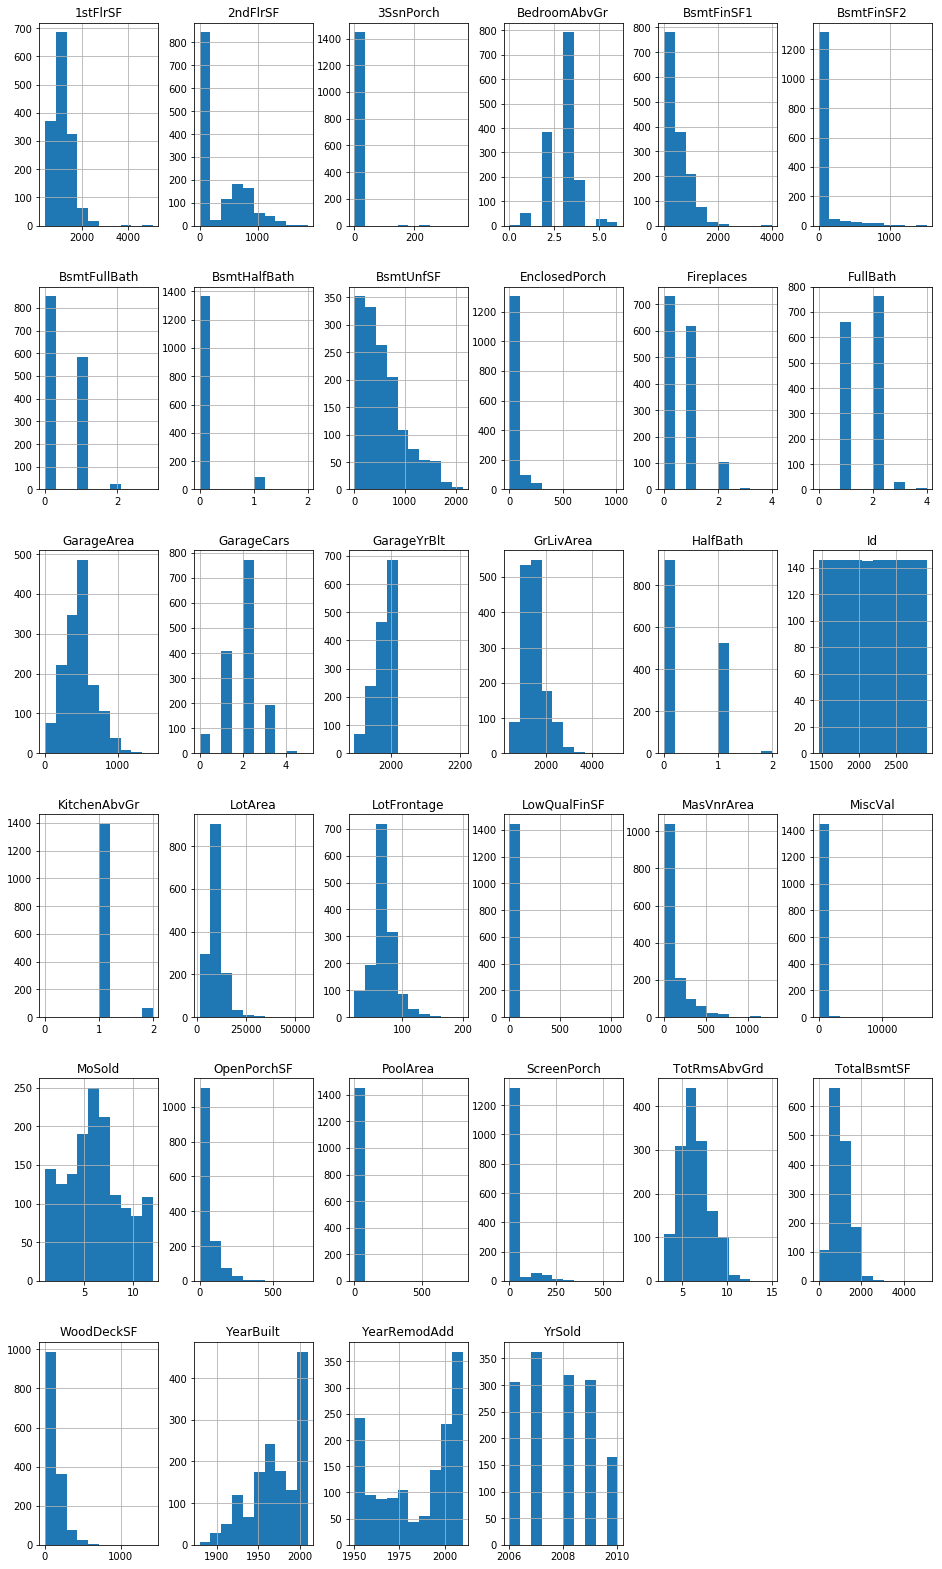

In [618]:
df_test1.hist(figsize = (16,28))
plt.show()

In [619]:
df_test1_obj=df_test1.select_dtypes(exclude=['int64','float64'])
df_test1_num=df_test1.select_dtypes(include=['int64','float64'])
df_test1.dtypes

Id                  int64
MSSubClass       category
MSZoning           object
LotFrontage       float64
LotArea             int64
Street             object
Alley              object
LotShape           object
LandContour        object
Utilities          object
LotConfig          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
BldgType           object
HouseStyle         object
OverallQual      category
OverallCond      category
YearBuilt           int64
YearRemodAdd        int64
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType         object
MasVnrArea        float64
ExterQual          object
ExterCond          object
Foundation         object
                   ...   
HalfBath            int64
BedroomAbvGr        int64
KitchenAbvGr        int64
KitchenQual        object
TotRmsAbvGrd        int64
Functional         object
Fireplaces          int64
FireplaceQu 

In [620]:
df_test2_encoded=df_test1_obj.apply(LabelEncoder().fit_transform)
df_test2_encoded.reset_index(drop=True)
df_test2=df_test1_num.join(df_test2_encoded)
df_test2.head(5)
df_test2.shape

(1459, 80)

In [621]:
df_test2.isnull().sum()

Id               0
LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
                ..
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish

In [622]:
df_test2.isnull().sum()

Id               0
LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
                ..
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish

In [623]:
df_test2.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSSubClass',
       'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrica

In [624]:
df_test2.shape

(1459, 80)

# Final Output

In [625]:
# print(id_val)
df_test2= df_test2.drop("Id",axis=1)
pred1 = model.predict(df_test2)
output=pd.DataFrame(pred1)
final = pd.DataFrame(id_val).join(output)
final.columns=["Id","SalePrice"]
#print(final.head())
# df_te2.columns
print(final)

        Id      SalePrice
0     1461  201853.469547
1     1462  268062.803669
2     1463  263997.549299
3     1464  291604.207694
4     1465  289880.931532
5     1466  273125.758437
6     1467  291187.039220
7     1468  266774.088391
8     1469  288986.456597
9     1470  217133.271488
10    1471  301124.039934
11    1472  208724.309561
12    1473  188889.239579
13    1474  249859.857702
14    1475  205026.117224
15    1476  446019.513721
16    1477  343582.207965
17    1478  408265.542000
18    1479  394337.103379
19    1480  509143.308930
20    1481  387754.398436
21    1482  318161.113558
22    1483  279413.202530
23    1484  275204.664448
24    1485  310674.748548
25    1486  315633.586755
26    1487  389038.169510
27    1488  336102.807672
28    1489  284409.297758
29    1490  335630.400655
...    ...            ...
1429  2890  183227.019181
1430  2891  250477.785499
1431  2892  135645.879143
1432  2893  198503.729513
1433  2894   77876.551653
1434  2895  409536.168241
1435  2896  

In [626]:
import xlwt 
from xlwt import Workbook
with pd.ExcelWriter('D:\\Codewarriors\\HPP\\final prediction hpp.xlsx') as writer:
    final.to_excel(writer,index = False)

In [627]:
df_res = pd.DataFrame(df_te['Id'])

In [632]:
df_res.head()

Id
0  1461
1  1462
2  1463
3  1464
4  1465

# Output of Sale price prediction

In [631]:
final

Id      SalePrice
0     1461  201853.469547
1     1462  268062.803669
2     1463  263997.549299
3     1464  291604.207694
4     1465  289880.931532
5     1466  273125.758437
6     1467  291187.039220
7     1468  266774.088391
8     1469  288986.456597
9     1470  217133.271488
10    1471  301124.039934
11    1472  208724.309561
12    1473  188889.239579
13    1474  249859.857702
14    1475  205026.117224
15    1476  446019.513721
16    1477  343582.207965
17    1478  408265.542000
18    1479  394337.103379
19    1480  509143.308930
20    1481  387754.398436
21    1482  318161.113558
22    1483  279413.202530
23    1484  275204.664448
24    1485  310674.748548
25    1486  315633.586755
26    1487  389038.169510
27    1488  336102.807672
28    1489  284409.297758
29    1490  335630.400655
...    ...            ...
1429  2890  183227.019181
1430  2891  250477.785499
1431  2892  135645.879143
1432  2893  198503.729513
1433  2894   77876.551653
1434  2895  409536.168241
1435  2896  359705.331818
1436  2897  328125.052146
1437  2898  241387.141891
1438  2899  326237.503481
1439  2900  243437.958356
1440  2901  333451.840716
1441  2902  313050.086796
1442  2903  413645.629145
1443  2904  456153.744038
1444  2905  169422.858337
1445  2906  307094.799891
1446  2907  209264.319010
1447  2908  224599.913279
1448  2909  242163.131672
1449  2910  179395.310199
1450  2911  166133.145237
1451  2912  258544.302840
1452  2913  155129.032645
1453  2914  163970.137577
1454  2915  174830.409402
1455  2916  156912.945648
1456  2917  234986.102761
1457  2918  215958.168911
1458  2919  347641.137752

[1459 rows x 2 columns]